<a href="https://colab.research.google.com/gist/Melvinchen0404/11a78ca0e15ba2e068b2434d6596f690/parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NLP Technique 3: Parsing
A **parse** is a structural representation of an input sentence \
**Parsing** refers to the process of converting a flat input sentence into a **hierarchical structure** \
Here is an online **sentence-parsing** resource: https://www.link.cs.cmu.edu/link/submit-sentence-4.html 

\
**STEP 1:** We can access a `CFG` (**context-free grammar**) and read the grammar from a string and access its rules in the `nltk` package. Suppose we define as our sample sentence a fragment of the first sentence from Joyce's *Ulysses*: \
Stately, plump Buck Mulligan came from the stairhead. \
**STEP 2:** We **tokenize** the words in this sentence (using the `word_tokenize` function) and get rid of the punctuation (using the `.isalnum()` function) \


In [2]:
import nltk
nltk.download('punkt')

class color:
   BOLD = '\033[1m'
   END = '\033[0m'

text2 = 'Stately, plump Buck Mulligan came from the stairhead'
tokens3 = nltk.word_tokenize(text2)
tokens4 = [word for word in tokens3 if word.isalnum()]
print(color.BOLD + 'Tokenized words in sentence fragment: \n' + color.END, tokens4)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokenized words in sentence fragment: 
 ['Stately', 'plump', 'Buck', 'Mulligan', 'came', 'from', 'the', 'stairhead']


**STEP 3:** We will then define a simple grammar for the sentence \
The following online **sentence-parsing** resource may be used for guidance: https://www.link.cs.cmu.edu/cgi-bin/link/construct-page-4.cgi#submit \
For proper nouns such as 'Buck Mulligan', we could use G to join proper nouns together

In [3]:
ulysses = nltk.CFG.fromstring("""
... S -> NP VP
... VP -> V PP
... NP -> ADJP NP
... PP -> P NP
... ADJP -> Adj Adj
... NP -> Det N | G G
... N -> 'stairhead' 
... Adj -> 'Stately' | 'plump'
... V -> 'came'
... P -> 'from'
... Det -> 'the'
... G -> 'Buck' | 'Mulligan'
... """)

**STEP 4:** We can then produce a bracketed structure that may be depicted as a **sentence syntax tree**

In [4]:
parser = nltk.ChartParser(ulysses)
for tree in parser.parse(tokens4):
  print(tree)

(S
  (NP (ADJP (Adj Stately) (Adj plump)) (NP (G Buck) (G Mulligan)))
  (VP (V came) (PP (P from) (NP (Det the) (N stairhead)))))


**STEP 5:** For more advanced users, there is the **Penn treebank**, a project that annotates naturally occurring text for linguistic structure \
A **treebank** is a **parsed text corpus** that annotates **syntactic or semantic sentence structure**. **Penn treebank** contains 40,000 sentences of *WSJ* newspaper text annotated with **phrase structure trees** and it took 3 years to create \
`treebank` is 10% of the entire **Penn treebank** corpus: it contains 3,914 syntactically annotated sentences \
A full description of the **Penn treebank** project may be found here: https://web.archive.org/web/20131109202842/http://www.cis.upenn.edu/~treebank/ \
a) We can install `svgling`, pure Python package for doing single-pass rendering of linguistics-style constituent trees into **SVG (Scalable Vector Graphics)**; \
b) We can import `treebank` (10% of the **Penn treebank** corpus) from `nltk.corpus` and access the first sentence of the corpus; \
c) We can print out the annotated **syntactic tree** for each of the 3,914 sentences in `treebank`. We can pick a number *n* (0-3,913) for any of these 3,914 sentences: *n* = 0 for the first sentence and *n* = 3913 for the final sentence of this `treebank` corpus

In [5]:
#@markdown ###**Pick a sentence number (0-3913) for the treebank corpus**
#@markdown ---
Sentence_number =  0#@param {type:"number"}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 4.1 MB/s 


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


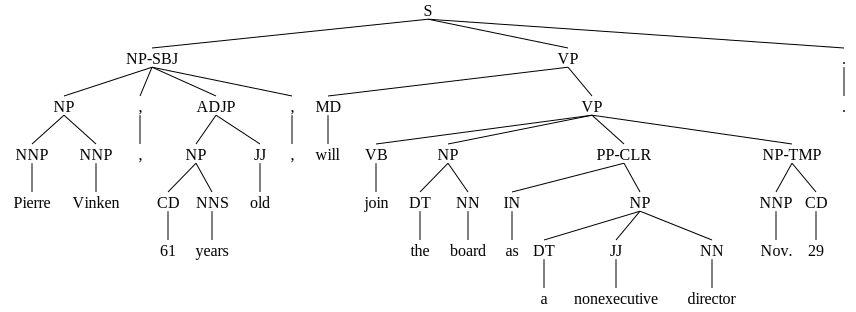

In [6]:
!pip3 install svgling
import svgling
nltk.download('treebank')
tr1 = nltk.corpus.treebank.parsed_sents()[Sentence_number]
tr1